In [63]:
#Question 1: EDA – Sentiment Analysis from Drug Reviews (Easy)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [64]:
df = pd.read_csv('drugLibTrain_raw.tsv', sep='\t')

In [65]:
print("Dataset Info:")
print(df.info())
print("\nDataset Shape:", df.shape)

print("\nFirst 5 Rows:")
print(df.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  3032 non-null   object
 8   commentsReview     3095 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB
None

Dataset Shape: (3107, 9)

First 5 Rows:
   Unnamed: 0       urlDrugName  rating         effectiveness  \
0        2202         enalapril       4      Highly Effective   
1        3117  ortho-tri-cyclen       1      Highly Effective   
2        1146           ponstel      10      Highly Effective   
3    

In [66]:
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
Unnamed: 0            0
urlDrugName           0
rating                0
effectiveness         0
sideEffects           0
condition             1
benefitsReview       18
sideEffectsReview    75
commentsReview       12
dtype: int64


In [67]:

if 'condition' in df.columns:
    print("\n Condition distribution:")
    print(df['condition'].value_counts())

if 'rating' in df.columns:
    print("\n Rating distribution:")
    print(df['rating'].value_counts())

if 'sentiment' in df.columns:
    print("\n Sentiment distribution:")
    print(df['sentiment'].value_counts())


 Condition distribution:
condition
depression                    236
acne                          165
anxiety                        63
insomnia                       54
birth control                  49
                             ... 
sleep walking/talking           1
sore throat ear infections      1
nerve disorder                  1
skin cancer                     1
birth prevention                1
Name: count, Length: 1426, dtype: int64

 Rating distribution:
rating
10    742
8     558
9     480
7     350
1     305
5     159
6     157
3     146
4     107
2     103
Name: count, dtype: int64


In [68]:
if 'condition' in df.columns:
    print("\n Condition distribution (%):")
    print(df['condition'].value_counts(normalize=True) * 100)

if 'rating' in df.columns:
    print("\n Rating distribution (%):")
    print(df['rating'].value_counts(normalize=True) * 100)

if 'sentiment' in df.columns:
    print("\n Sentiment distribution (%):")
    print(df['sentiment'].value_counts(normalize=True) * 100)


 Condition distribution (%):
condition
depression                    7.598197
acne                          5.312299
anxiety                       2.028332
insomnia                      1.738571
birth control                 1.577592
                                ...   
sleep walking/talking         0.032196
sore throat ear infections    0.032196
nerve disorder                0.032196
skin cancer                   0.032196
birth prevention              0.032196
Name: proportion, Length: 1426, dtype: float64

 Rating distribution (%):
rating
10    23.881558
8     17.959446
9     15.448986
7     11.264886
1      9.816543
5      5.117477
6      5.053106
3      4.699067
4      3.443836
2      3.315095
Name: proportion, dtype: float64


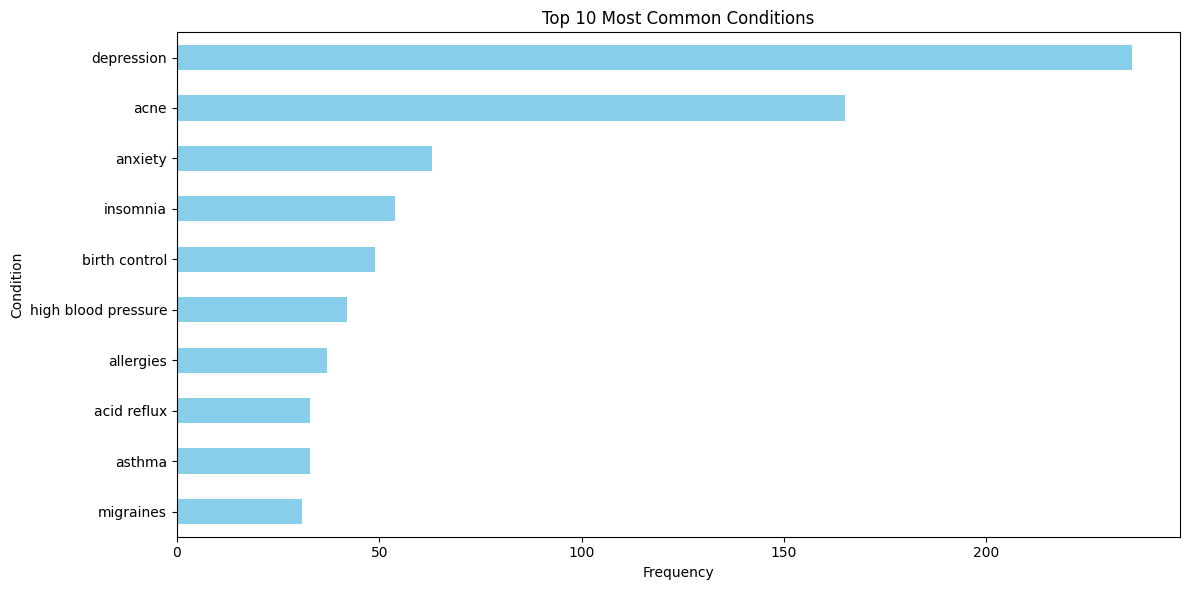

In [69]:
if 'condition' in df.columns:
    plt.figure(figsize=(12, 6))
    df['condition'].value_counts().head(10).plot(kind='barh', color='skyblue')
    plt.title('Top 10 Most Common Conditions')
    plt.xlabel('Frequency')
    plt.ylabel('Condition')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-70-2127658633.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


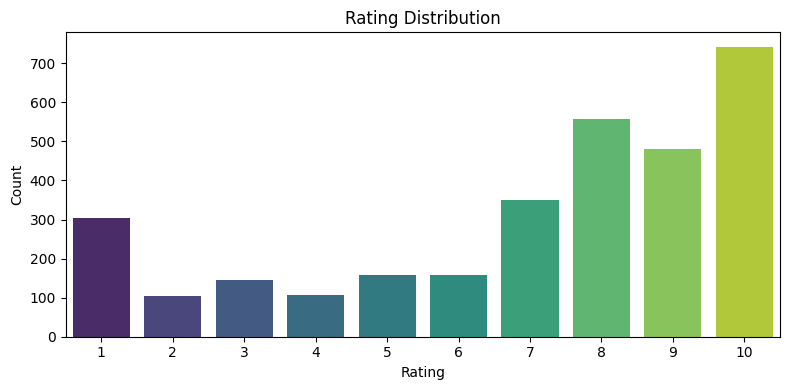

In [70]:
if 'rating' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x='rating', data=df, palette='viridis')
    plt.title('Rating Distribution')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [71]:
if 'sentiment' in df.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='sentiment', data=df, palette='Set2')
    plt.title('Sentiment Distribution')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

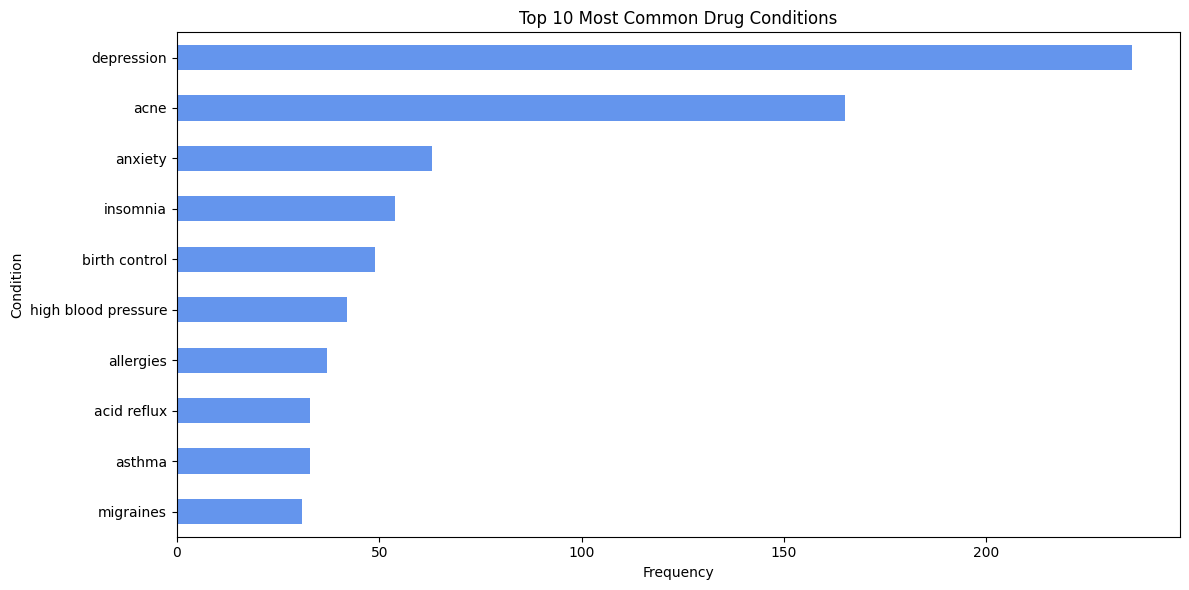

In [72]:


df = pd.read_csv('drugLibTrain_raw.tsv', sep='\t')

top_conditions = df['condition'].value_counts().head(10)

# Plot
plt.figure(figsize=(12, 6))
top_conditions.plot(kind='barh', color='cornflowerblue')
plt.title('Top 10 Most Common Drug Conditions')
plt.xlabel('Frequency')
plt.ylabel('Condition')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [73]:
df = df[df['condition'].notnull()]

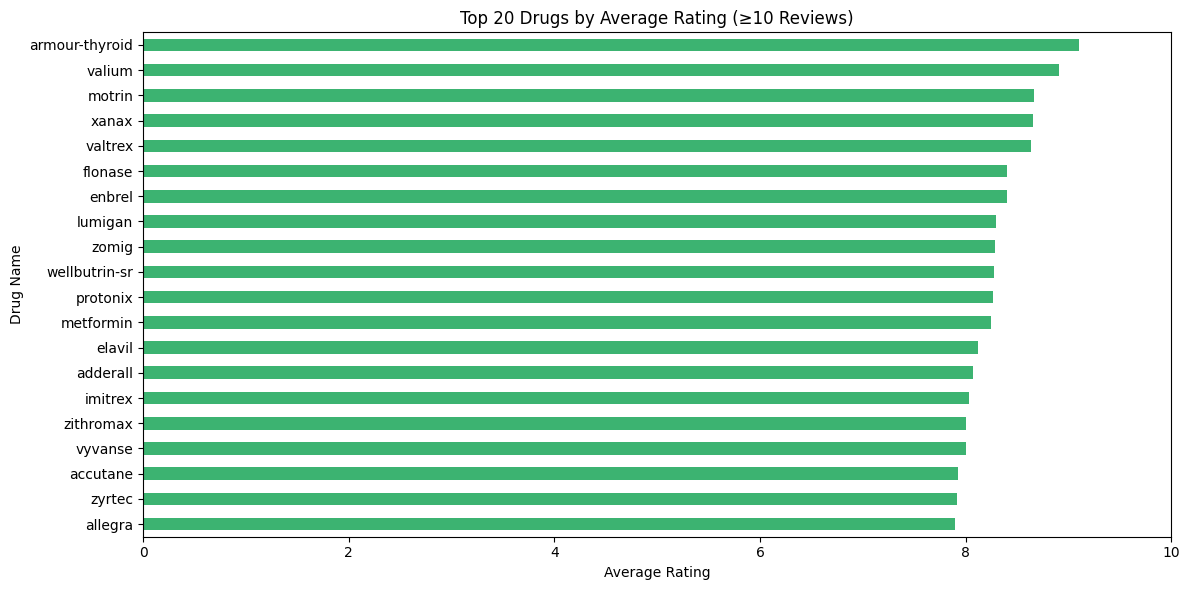

In [74]:


# Drop rows with missing drugName or rating
df = df.dropna(subset=['urlDrugName', 'rating'])

# Calculate average rating per drug
avg_rating = df.groupby('urlDrugName')['rating'].mean().sort_values(ascending=False)

# Optionally: Filter to only drugs with enough reviews (e.g., at least 10)
drug_counts = df['urlDrugName'].value_counts()
popular_drugs = drug_counts[drug_counts >= 10].index
avg_rating_filtered = avg_rating[avg_rating.index.isin(popular_drugs)]

# Select top 20 drugs by average rating
top_avg_rated = avg_rating_filtered.head(20)

# Plot
plt.figure(figsize=(12, 6))
top_avg_rated.sort_values().plot(kind='barh', color='mediumseagreen')
plt.title('Top 20 Drugs by Average Rating (≥10 Reviews)')
plt.xlabel('Average Rating')
plt.ylabel('Drug Name')
plt.xlim(0, 10)  # Ratings usually from 1 to 10
plt.tight_layout()
plt.show()


In [75]:
print(df.columns.tolist())

['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


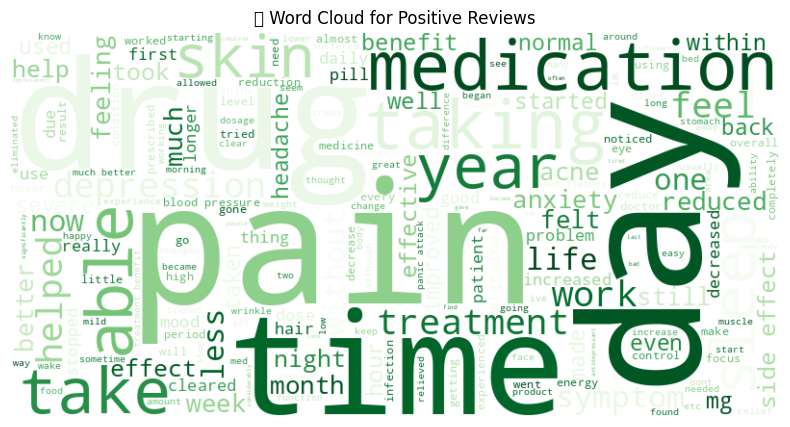

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128162 (\N{ANGER SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


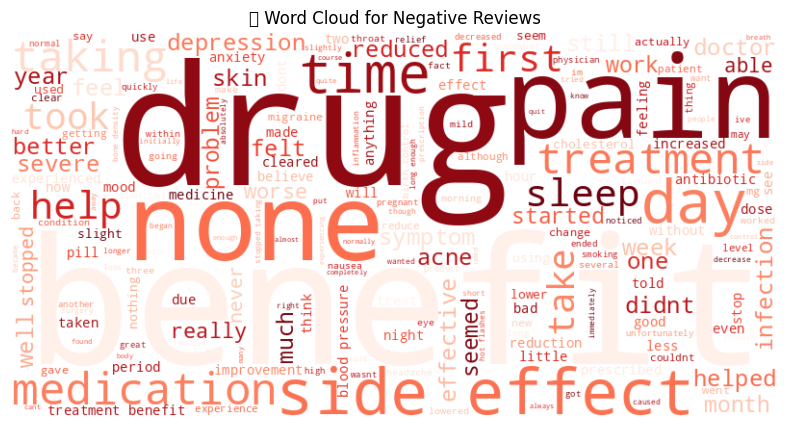

In [76]:

from wordcloud import WordCloud, STOPWORDS
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

# Load data
df = pd.read_csv('drugLibTrain_raw.tsv', sep='\t')

# --- Step 1: Clean review text ---
def clean_text(text):
    if pd.isnull(text):
        return ''
    text = text.lower()  # lowercase
    text = re.sub(r'<.*?>', '', text)  # remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)  # keep only letters
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace
    return text

# Apply to the review/comments column
text_col = 'benefitsReview' if 'sideEffectsReview' in df.columns else 'commentsReview'
df[text_col] = df[text_col].apply(clean_text)

# --- Step 2: Assign sentiment ---
df = df[df['rating'].notnull()]  # drop NaN ratings
df['sentiment'] = df['rating'].apply(lambda x: 'positive' if x >= 7 else ('negative' if x <= 3 else 'neutral'))

# --- Step 3: Separate positive and negative texts ---
positive_text = ' '.join(df[df['sentiment'] == 'positive'][text_col])
negative_text = ' '.join(df[df['sentiment'] == 'negative'][text_col])

# --- Step 4: Generate word clouds ---
stopwords = set(STOPWORDS)

# Positive word cloud
positive_wc = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, colormap='Greens').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title('🌟 Word Cloud for Positive Reviews')
plt.show()

# Negative word cloud
negative_wc = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, colormap='Reds').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title('💢 Word Cloud for Negative Reviews')
plt.show()


In [77]:
print(df.columns.tolist())

['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview', 'sentiment']


In [78]:
 #Classification – Review Sentiment Prediction (Medium)
#1.	Convert ratings to binary sentiment labels (e.g., rating ≥ 7 → positive, else negative).


# Drop rows with missing ratings or review text
df = df.dropna(subset=['rating', 'commentsReview'])  # replace 'comments' if your review column is named differently

# Convert ratings to binary sentiment
df['sentiment'] = df['rating'].apply(lambda x: 'positive' if x >= 7 else 'negative')

# Preview the results
print(df[['rating', 'sentiment']].head())
print("\nSentiment class distribution:")
print(df['sentiment'].value_counts())


   rating sentiment
0       4  negative
1       1  negative
2      10  positive
3       3  negative
4       2  negative

Sentiment class distribution:
sentiment
positive    2123
negative     972
Name: count, dtype: int64


/tmp/ipython-input-78-1689377497.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sentiment'] = df['rating'].apply(lambda x: 'positive' if x >= 7 else 'negative')


In [79]:
print(df.columns.tolist())

['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'sideEffects', 'condition', 'benefitsReview', 'sideEffectsReview', 'commentsReview', 'sentiment']


In [80]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [81]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# Load dataset
#df = pd.read_csv('drugLibTrain_raw.tsv', sep='\t')

# Drop missing values in key columns
df = df.dropna(subset=['commentsReview', 'rating'])

# Create sentiment column (if not already present)
df['sentiment'] = df['rating'].apply(lambda x: 'positive' if x >= 7 else 'negative')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def preprocess(text):
    if not isinstance(text, str):  # avoid non-string input
        return ""
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)           # remove HTML tags
    text = re.sub(r'[^a-z\s]', '', text)        # remove punctuation & digits
    try:
        tokens = word_tokenize(text)            # tokenize
    except Exception as e:
        print("Tokenization error:", e)
        return ""
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w not in stop_words and len(w) > 2]
    return ' '.join(tokens)


# Apply preprocessing
# ✅ This line applies preprocessing to the comments
df['cleaned_text'] = df['commentsReview'].apply(preprocess)

# Preview result
df[['commentsReview', 'effectiveness', 'sentiment']].head()



,commentsReview,effectiveness,sentiment
0,"monitor blood pressure , weight and asses for ...",Highly Effective,negative
1,"I Hate This Birth Control, I Would Not Suggest...",Highly Effective,negative
2,I took 2 pills at the onset of my menstrual cr...,Highly Effective,positive
3,I was given Prilosec prescription at a dose of...,Marginally Effective,negative
4,See above,Marginally Effective,negative


In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Input: cleaned text
texts = df['effectiveness']

# Vectorizer
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = vectorizer.fit_transform(texts)

# Output labels
y = df['sentiment']

print("TF-IDF feature matrix shape:", X.shape)


TF-IDF feature matrix shape: (3095, 10)


In [83]:
#4.	Train and evaluate Logistic Regression and Random Forest models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [84]:
# Assuming you already have:
# - X: TF-IDF features (from TfidfVectorizer)
# - y: sentiment labels (positive/negative)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [85]:
# Initialize and train
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict
y_pred_logreg = logreg.predict(X_test)

# Evaluate
print("🔹 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


🔹 Logistic Regression Results:
Accuracy: 0.8384491114701131
              precision    recall  f1-score   support

    negative       0.78      0.68      0.72       193
    positive       0.86      0.91      0.89       426

    accuracy                           0.84       619
   macro avg       0.82      0.79      0.80       619
weighted avg       0.84      0.84      0.84       619



In [86]:
 #Train Logistic Regression
# Initialize and train
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict
y_pred_logreg = logreg.predict(X_test)

# Evaluate
print("🔹 Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


🔹 Logistic Regression Results:
Accuracy: 0.8384491114701131
              precision    recall  f1-score   support

    negative       0.78      0.68      0.72       193
    positive       0.86      0.91      0.89       426

    accuracy                           0.84       619
   macro avg       0.82      0.79      0.80       619
weighted avg       0.84      0.84      0.84       619



In [87]:
      #Train Random Forest
# Initialize and train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("🔹 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


🔹 Random Forest Results:
Accuracy: 0.8384491114701131
              precision    recall  f1-score   support

    negative       0.78      0.68      0.72       193
    positive       0.86      0.91      0.89       426

    accuracy                           0.84       619
   macro avg       0.82      0.79      0.80       619
weighted avg       0.84      0.84      0.84       619



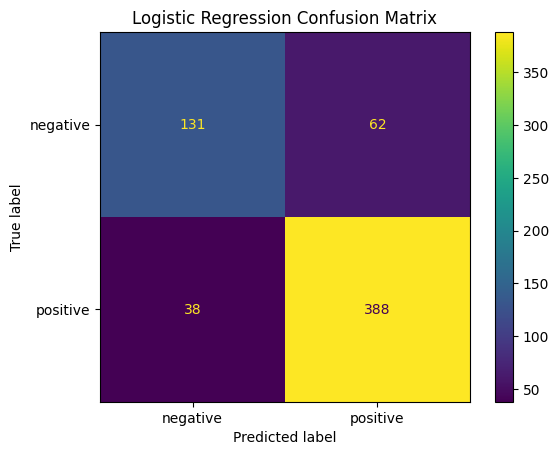

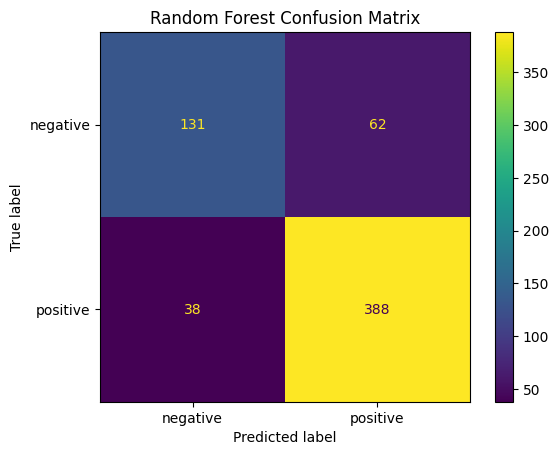

In [88]:
      # Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix for Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logreg)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Confusion Matrix for Random Forest
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logreg)
plt.title("Random Forest Confusion Matrix")
plt.show()
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf.predict(X_test)


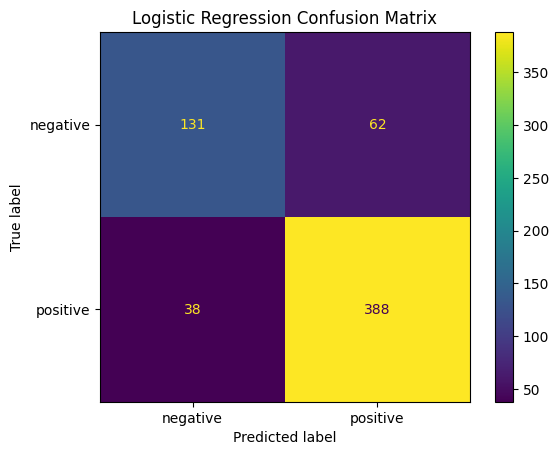

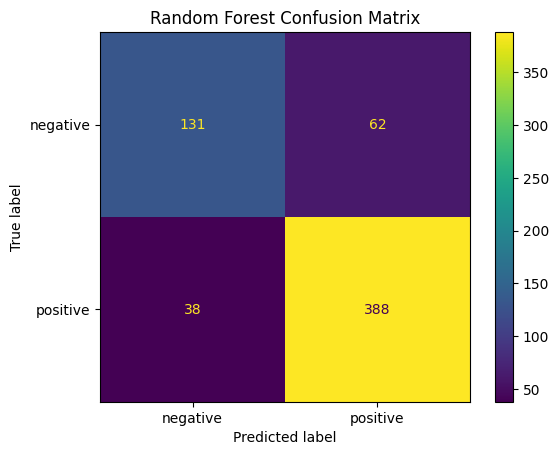

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix for Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logreg)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

# Confusion Matrix for Random Forest
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title("Random Forest Confusion Matrix")
plt.show()


In [90]:
#5.	Compare precision, recall, and F1-score.

from sklearn.metrics import classification_report

# Print evaluation for Logistic Regression
print("🔹 Logistic Regression Report:")
print(classification_report(y_test, y_pred_logreg))

# Print evaluation for Random Forest
print("🔹 Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


🔹 Logistic Regression Report:
              precision    recall  f1-score   support

    negative       0.78      0.68      0.72       193
    positive       0.86      0.91      0.89       426

    accuracy                           0.84       619
   macro avg       0.82      0.79      0.80       619
weighted avg       0.84      0.84      0.84       619

🔹 Random Forest Report:
              precision    recall  f1-score   support

    negative       0.78      0.68      0.72       193
    positive       0.86      0.91      0.89       426

    accuracy                           0.84       619
   macro avg       0.82      0.79      0.80       619
weighted avg       0.84      0.84      0.84       619



In [91]:
from sklearn.metrics import classification_report
import pandas as pd

# Get reports as dicts
log_report = classification_report(y_test, y_pred_logreg, output_dict=True)
rf_report = classification_report(y_test, y_pred_rf, output_dict=True)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Logistic Regression': pd.Series(log_report['weighted avg']),
    'Random Forest': pd.Series(rf_report['weighted avg'])
})

print("🔍 Precision/Recall/F1 Comparison (Weighted Average):")
print(comparison_df[['Logistic Regression', 'Random Forest']])


🔍 Precision/Recall/F1 Comparison (Weighted Average):
           Logistic Regression  Random Forest
precision             0.835073       0.835073
recall                0.838449       0.838449
f1-score              0.835307       0.835307
support             619.000000     619.000000


In [92]:
#6.	Perform hyperparameter tuning on the better model.

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


In [93]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}


In [94]:
# Use original X_train and y_train from your train/test split
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2,
                           scoring='f1_weighted')

grid_search.fit(X_train, y_train)


Fitting 3 folds for each of 48 candidates, totalling 144 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1_weighted', verbose=2)

In [95]:
print("Best Parameters:", grid_search.best_params_)

# Predict with best estimator
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report
print("Tuned Random Forest Results:")
print(classification_report(y_test, y_pred_best))


Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest Results:
              precision    recall  f1-score   support

    negative       0.78      0.68      0.72       193
    positive       0.86      0.91      0.89       426

    accuracy                           0.84       619
   macro avg       0.82      0.79      0.80       619
weighted avg       0.84      0.84      0.84       619



In [96]:
#7.	Save final model and vectorizer for deployment.
import joblib

# Save best model (e.g., Random Forest)
joblib.dump(best_rf, 'sentiment_model.pkl')

# Save TF-IDF vectorizer
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

print("✅ Model and vectorizer saved successfully!")


✅ Model and vectorizer saved successfully!


In [97]:
import joblib

# Load model and vectorizer
model = joblib.load('sentiment_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Predict new review
new_review = ["I feel great after taking this medicine."]
cleaned = preprocess(new_review[0])  # use your preprocessing function
features = vectorizer.transform([cleaned])
prediction = model.predict(features)

print("Prediction:", prediction[0])


Prediction: negative


In [98]:
#Question 3: Transformer-Based Sentiment Analysis Web App (Hard)
#1.	Fine-tune a transformer (e.g., distilbert-base-uncased) for binary sentiment
!pip install transformers datasets scikit-learn torch

In [99]:
import pandas as pd
df = pd.read_csv("drugLibTrain_raw.tsv", sep="\t")
# Convert rating to binary sentiment
df['label'] = df['rating'].apply(lambda x: 1 if x >= 7 else 0)

# Drop missing rows
df = df.dropna(subset=['commentsReview', 'label'])

# Rename for clarity
df = df.rename(columns={'commentsReview': 'text'})


In [100]:
from datasets import Dataset

dataset = Dataset.from_pandas(df[['text', 'label']])


In [101]:
from transformers import DistilBertTokenizerFast

tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

def tokenize_function(examples):
    return tokenizer(examples['text'], padding="max_length", truncation=True)

tokenized_dataset = dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/3095 [00:00<?, ? examples/s]

In [102]:
tokenized_dataset = tokenized_dataset.train_test_split(test_size=0.2)


In [103]:
from transformers import DistilBertForSequenceClassification

model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=2
)


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [104]:
!pip install

ERROR: You must give at least one requirement to install (see "pip help install")


In [105]:
import transformers
print(transformers.__version__)

4.53.1


In [106]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    do_train=True,
    do_eval=True,
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    logging_dir="./logs",
)

In [107]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

def compute_metrics(eval_pred):
    logits, labels = eval_pred

    # Binary classification handling:
    if logits.shape[1] == 1:
        # Single sigmoid output (num_labels=1)
        preds = (logits > 0).astype(int)
    else:
        # Two-class softmax output (num_labels=2)
        preds = np.argmax(logits, axis=1)

    return {
        "accuracy": accuracy_score(labels, preds),
        "f1": f1_score(labels, preds)
    }



In [108]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


/tmp/ipython-input-108-136968635.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [109]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)


/tmp/ipython-input-109-4196770633.py:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [110]:
model.save_pretrained("./distilbert-sentiment")
tokenizer.save_pretrained("./distilbert-sentiment")


('./distilbert-sentiment/tokenizer_config.json',
 './distilbert-sentiment/special_tokens_map.json',
 './distilbert-sentiment/vocab.txt',
 './distilbert-sentiment/added_tokens.json',
 './distilbert-sentiment/tokenizer.json')

In [111]:

!pip install transformers datasets


In [112]:
#2.	Tokenize and encode the text.
from transformers import DistilBertTokenizerFast
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')


In [113]:
# Tokenization Function
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)


In [114]:
tokenized_dataset = dataset.map(tokenize_function, batched=True)


Map:   0%|          | 0/3095 [00:00<?, ? examples/s]

In [115]:
text = "This drug worked really well for my condition."

# Encode a single text
encoded_input = tokenizer(text, padding="max_length", truncation=True, return_tensors="pt")

print(encoded_input)


{'input_ids': tensor([[ 101, 2023, 4319, 2499, 2428, 2092, 2005, 2026, 4650, 1012,  102,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
            0,

In [116]:
##4.	Evaluate performance using accuracy and F1-score.
from sklearn.metrics import accuracy_score, f1_score
import numpy as np
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    # Convert logits to predictions (for binary classification, threshold at 0.5)
    preds = (logits > 0).astype(int) if logits.shape[1] == 1 else np.argmax(logits, axis=1)

    return {
        'accuracy': accuracy_score(labels, preds),
        'f1': f1_score(labels, preds)
    }


In [117]:
#5.	Build a Streamlit app
#Input: User enters a drug review.
#Output: Predicted sentiment (positive/negative) + confidence score.
# Display attention map or top words influencing prediction.
!pip install streamlit transformers torch




In [118]:
import streamlit as st
import torch
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification

@st.cache_resource
def load_model():
    model = DistilBertForSequenceClassification.from_pretrained("distilbert-sentiment")
    tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-sentiment")
    return model, tokenizer


In [119]:
import streamlit as st
import torch
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
import torch.nn.functional as F

# Load model and tokenizer once
@st.cache_resource
def load_model():
    model = DistilBertForSequenceClassification.from_pretrained("distilbert-sentiment")
    tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-sentiment")
    return model, tokenizer

model, tokenizer = load_model()
model.eval()

# App UI
st.title("Drug Review Sentiment Analyzer")
st.write("Enter a drug review to analyze sentiment (positive or negative).")

text = st.text_area("Your drug review:", height=150)

if text:
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits

        if logits.shape[1] == 1:
            probs = torch.sigmoid(logits)
            pred = int(probs > 0.5)
            confidence = probs.item()
        else:
            probs = F.softmax(logits, dim=1)
            pred = torch.argmax(probs, dim=1).item()
            confidence = probs[0][pred].item()

    label = "Positive" if pred == 1 else "Negative"
    st.markdown(f"### Prediction: {label}")
    st.markdown(f"**Confidence:** `{confidence:.2f}`")

    # Approximate token influence using attention-like display
    st.subheader("🔍 Top Influential Words (Token Importance Approximation)")
    tokens = tokenizer.convert_ids_to_tokens(inputs['input_ids'][0])
    token_scores = probs[0][pred].item()  # crude single-score heat

    # Simple heat-based highlight
    for token in tokens:
        clean_token = token.replace("##", "")
        opacity = confidence  # just a flat display based on confidence
        st.markdown(
            f"<span style='background-color:rgba(30,144,255,{opacity}); color:white; padding:3px; margin:2px; border-radius:5px'>{clean_token}</span> ",
            unsafe_allow_html=True
        )


2025-07-11 09:10:05.552 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 09:10:05.559 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 09:10:05.562 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 09:10:05.568 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 09:10:05.570 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 09:10:05.570 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 09:10:05.581 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-11 09:10:05.599 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar